In [107]:
import shutil

def unzip_file(file_path, extract_path):
    shutil.unpack_archive(file_path, extract_path)

# Example usage
zip_file_path = './trial_6-20230610T130222Z-001.zip'
extract_to_path = 'content/'
unzip_file(zip_file_path, extract_to_path)


In [26]:
import os
import pandas as pd

# Specify the parent directory containing the date-named folders
parent_directory = 'content/trial_6/sensorTower/'

# List all the folders in the parent directory, sorted by name (date)
folders = sorted([f for f in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, f))])




# Create an empty DataFrame with the datetime_range as the index
maindataframe = pd.DataFrame()

# Loop through the folders in date order
for folder in folders:
        
    folder_dataframe = pd.DataFrame()    
    
    folder_path = os.path.join(parent_directory, folder)
    
    # Get the paths of the CSV files in the current folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Sort the CSV files by name (file1.csv, file2.csv, file3.csv)
    csv_files = sorted(csv_files)  
    
    
  

    
    for file in csv_files:
       
        sensor = os.path.splitext(os.path.basename(file))[0]
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
    
        
        # Combine the 'date' and 'time' columns into a single datetime column
        df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
        # Set the 'time' column as the DataFrame index
        df.set_index('datetime', inplace=True)
        
       
        # Resample the DataFrame using 'H' offset alias and select the first entry from each hour
        df = df.resample('1T').first()
                
        df.drop(['date', 'time'], axis=1, inplace=True)    
        # Add the CSV filename as a prefix to each column name
        df.columns = [f"{os.path.basename(sensor)}/{column}" for column in df.columns]
        
        
        if folder_dataframe.empty:
            folder_dataframe = df
        else:
            folder_dataframe = pd.merge(folder_dataframe, df, how='outer', on='datetime')
    
    try:
        # Concatenate the current DataFrame with the main DataFrame
        maindataframe = pd.concat([maindataframe,folder_dataframe])
    except :
        # Print the error message and the problematic index values
        continue

                

maindataframe.to_csv("external_data_frame.csv",index=True)
    



In [27]:
import os
import pandas as pd

# Specify the parent directory containing the date-named folders
parent_directory = 'content/trial_6/Controlling_Site/'

# List all the folders in the parent directory, sorted by name (date)
folders = sorted([f for f in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, f))])

# Create an empty DataFrame with the datetime_range as the index
maindataframe = pd.DataFrame()

# Loop through the folders in date order
for folder in folders:

    folder_path = os.path.join(parent_directory, folder)
    
    # Get the paths of the CSV files in the current folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Sort the CSV files by name (file1.csv, file2.csv, file3.csv)
    csv_files = sorted(csv_files)
    
    
    folder_dataframe = pd.DataFrame() 

    
    for file in csv_files:
       
        sensor = os.path.splitext(os.path.basename(file))[0]
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
    
        # Combine the 'date' and 'time' columns into a single datetime column
        df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
        # Set the 'time' column as the DataFrame index
        df.set_index('datetime', inplace=True)
        
        df.drop(['date', 'time','seqNo'], axis=1, inplace=True)
        # Resample the DataFrame using 'H' offset alias and select the first entry from each hour
        df = df.resample('1T').first()
        
        
        # Add the CSV filename as a prefix to each column name
        df.columns = [f"{os.path.basename(sensor)}/{column}" for column in df.columns]
    
        
        if folder_dataframe.empty:
            folder_dataframe = df
        else:
            folder_dataframe = pd.merge(folder_dataframe, df, how='outer', on='datetime')
    
    try:
        # Concatenate the current DataFrame with the main DataFrame
        maindataframe = pd.concat([maindataframe,folder_dataframe])
    except :
        # Print the error message and the problematic index values
        continue
                    
       
        
    
maindataframe.to_csv("internal_data_frame.csv",index=True)

    
    


In [30]:
# Read the CSV file into a DataFrame
external_df = pd.read_csv('./external_data_frame.csv')
internal_df = pd.read_csv('./internal_data_frame.csv')
dataframe = pd.merge(external_df, internal_df, how='outer', on='datetime')

dataframe.set_index('datetime', inplace=True)
dataframe.to_csv("dataframe.csv",index=True)



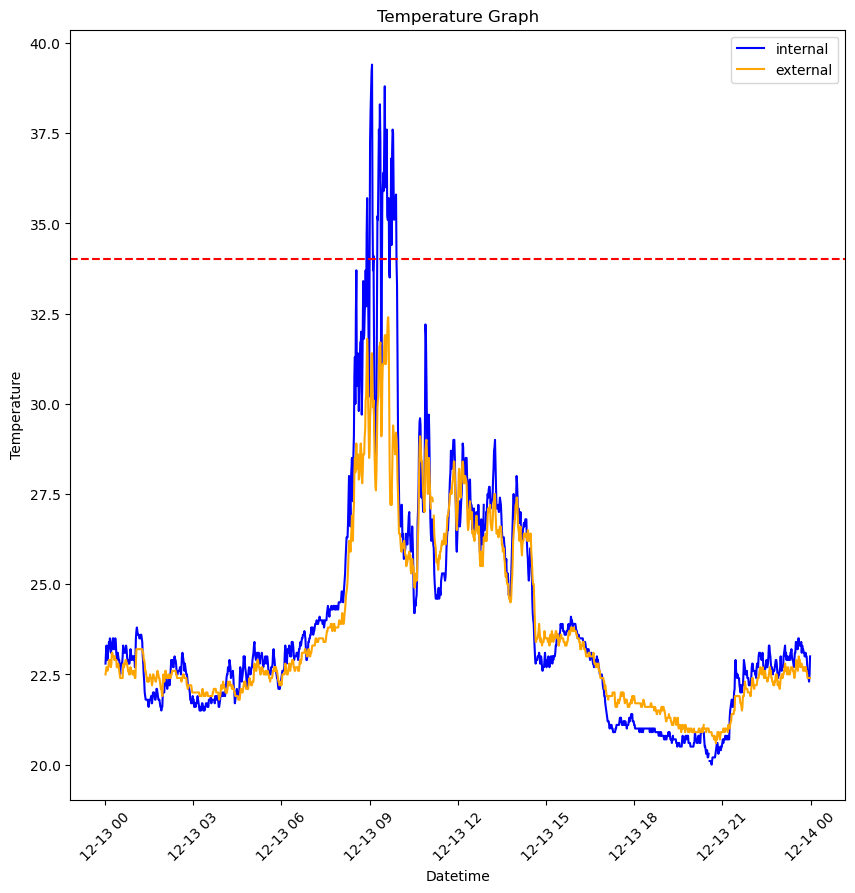

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./dataframe.csv')


desired_date = '2021-12-13'  # Specify the desired date
df['datetime'] = pd.to_datetime(df['datetime'])

df = df[df['datetime'].dt.date == pd.to_datetime(desired_date).date()]


df['10031/temp2'] = pd.to_numeric(df['10031/temp2'], errors='coerce')
df['10003/temp2'] = pd.to_numeric(df['10003/temp2'], errors='coerce')



# Plot the temperature graph
plt.figure(figsize=(10, 10))

# Plot '10031/temp2' in red color
plt.plot(df['datetime'], df['10031/temp2'], color='blue', label='internal')

# Plot '10003/temp2' in blue color
plt.plot(df['datetime'], df['10003/temp2'], color='orange', label='external')

# Add a horizontal line at y = 6
plt.axhline(y=34, color='red', linestyle='--')

plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Graph')
plt.legend()  # Display the legend with labels for each line

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better visibility

plt.show()


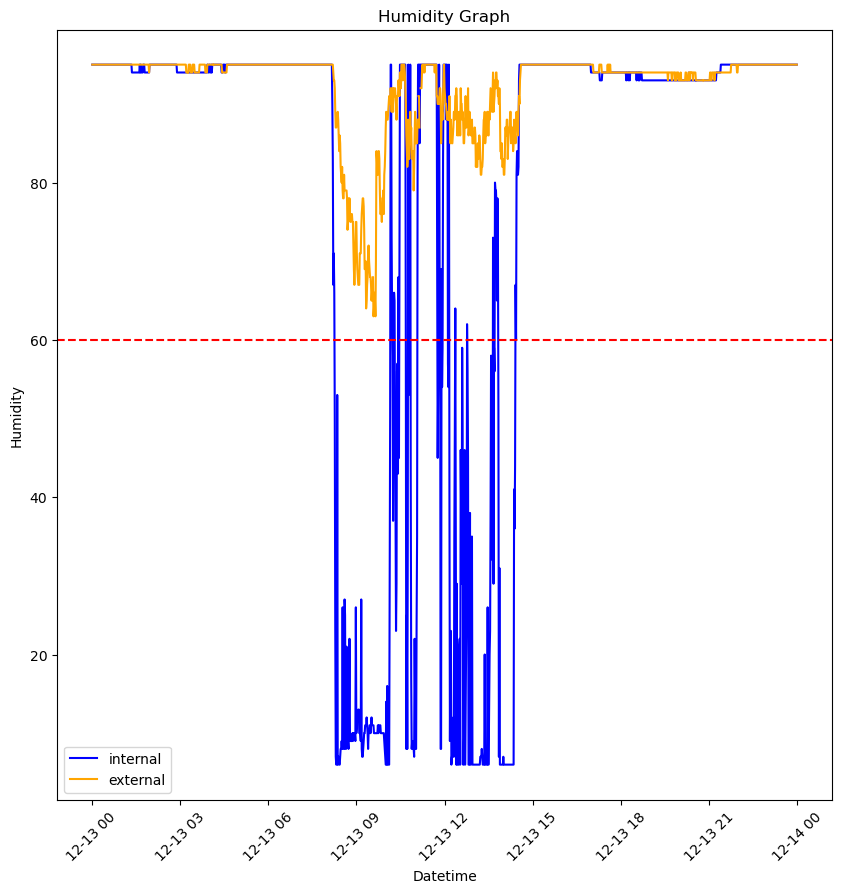

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./dataframe.csv')


desired_date = '2021-12-13'  # Specify the desired date
df['datetime'] = pd.to_datetime(df['datetime'])

df = df[df['datetime'].dt.date == pd.to_datetime(desired_date).date()]


df['10031/humidity2'] = pd.to_numeric(df['10031/humidity2'], errors='coerce')
df['10003/humidity2'] = pd.to_numeric(df['10003/humidity2'], errors='coerce')



# Plot the temperature graph
plt.figure(figsize=(10, 10))

# Plot '10031/humidity2' in red color
plt.plot(df['datetime'], df['10031/humidity2'], color='blue', label='internal')

# Plot '10003/humidity2' in blue color
plt.plot(df['datetime'], df['10003/humidity2'], color='orange', label='external')

# Add a horizontal line at y = 6
plt.axhline(y=60, color='red', linestyle='--')

plt.xlabel('Datetime')
plt.ylabel('Humidity')
plt.title('Humidity Graph')
plt.legend()  # Display the legend with labels for each line

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better visibility

plt.show()


In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

dataframe = pd.read_csv('./dataframe.csv')

dataframe.replace(' ?', np.nan, inplace=True)
dataframe.dropna(subset=['10031/temp2', '10031/light','10003/temp2','10003/light'], inplace=True)
# check for missing values
print(dataframe.isnull().sum())

# Convert temperature columns to numeric
dataframe['10031/temp2'] = pd.to_numeric(dataframe['10031/temp2'], errors='coerce')
dataframe['10031/light'] = pd.to_numeric(dataframe['10031/light'], errors='coerce')
dataframe['10003/temp2'] = pd.to_numeric(dataframe['10003/temp2'], errors='coerce')
dataframe['10003/light'] = pd.to_numeric(dataframe['10003/light'], errors='coerce')
# dataframe['10031/humidity2'] = pd.to_numeric(dataframe['10031/humidity2'], errors='coerce')
# dataframe['10003/humidity2'] = pd.to_numeric(dataframe['10003/humidity2'], errors='coerce')


y = dataframe[['10031/temp2', '10031/light']]
X = dataframe[['10003/temp2','10003/light']]

datetime               0
10031/siteId           0
10031/seqNo            0
10031/temp1         6881
10031/temp2            0
                   ...  
10034/temp3          118
10034/humidity1    13936
10034/humidity2       14
10034/humidity3      118
10034/light            0
Length: 84, dtype: int64


c:\Users\vilak\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,4,5,6,7,8,12,13,14,15,16,17,21,22,23,24,25,26,29,32,37,38,39,40,41,42,45,46,47,48,49,50,53,54,55,56,57,58,61,62,63,64,65,66,69,70,71,72,73,74,77,78,79,80,81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = model.score(X_train, y_train)

# Calculate test accuracy
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:",test_accuracy)

print(type(X_test))

Training Accuracy: 0.8613329024763784
Test Accuracy: 0.8600400350304648
<class 'pandas.core.frame.DataFrame'>
